## tweet stores Elon Musk's tweets from 2022-2023 and stock stores 

In [1]:
import pandas as pd
import numpy as np
from numba import jit

tweet = pd.read_csv('elon_musk_tweets.csv')
stock = pd.read_csv('Tasla_Stock_Updated_V2.csv')

In [2]:
save = tweet

In [3]:
tweet

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,1665143503108677634,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 23:48:42+00:00,@JonErlichman He’s not wrong …,NaN,Twitter for iPhone,361,4791,False
5900,1665139144425631747,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 23:31:23+00:00,"@alifarhat79 Guys, I think I maybe took too mu...",NaN,Twitter for iPhone,1609,61964,False
5901,1665137204782419968,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 23:23:41+00:00,@sriramk Cool,NaN,Twitter for iPhone,46,879,False
5902,1665131126900285445,Elon Musk,NaN,NaN,2009-06-02 20:12:29+00:00,143325985,330,25655,False,2023-06-03 22:59:31+00:00,@cb_doge Time to complete the circle,NaN,Twitter for iPhone,898,12467,False


In [4]:
tweet.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [5]:
tweet = tweet.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_verified', 'text', 'hashtags', 'source', 'is_retweet'], axis=1)

In [6]:
tweet

,user_followers,user_friends,user_favourites,date,retweets,favorites
0,101240855,115,13503,2022-07-05 17:55:09+00:00,335,6542
1,101240806,115,13503,2022-07-05 17:47:42+00:00,1451,30753
2,101240806,115,13503,2022-07-05 17:46:15+00:00,1284,28610
3,101240806,115,13503,2022-07-05 17:40:05+00:00,131,3640
4,101240806,115,13503,2022-07-05 17:38:23+00:00,1191,23790
...,...,...,...,...,...,...
5899,143325985,330,25655,2023-06-03 23:48:42+00:00,361,4791
5900,143325985,330,25655,2023-06-03 23:31:23+00:00,1609,61964
5901,143325985,330,25655,2023-06-03 23:23:41+00:00,46,879
5902,143325985,330,25655,2023-06-03 22:59:31+00:00,898,12467


In [7]:
import numpy as np
import matplotlib.pyplot as plt

'''
x = tweet['date']
y = tweet['user_followers']

tweet.plot(kind='line',
        x='date',
        y='user_followers',
        color='red')
 
# set the title
plt.title('ScatterPlot')
plt.xlabel('Date')
plt.ylabel('Followers (millions)')

locs = np.linspace(1, 5904, 9)
labels = []

count = 0

for i in np.arange(0, 5903, step=656):
    labels.append(tweet.iloc[i]['date'][0:10])
    count+=1
    

plt.xticks(locs, labels,rotation=30) 


 
# show the plot
plt.show()
'''

"\nx = tweet['date']\ny = tweet['user_followers']\n\ntweet.plot(kind='line',\n        x='date',\n        y='user_followers',\n        color='red')\n \n# set the title\nplt.title('ScatterPlot')\nplt.xlabel('Date')\nplt.ylabel('Followers (millions)')\n\nlocs = np.linspace(1, 5904, 9)\nlabels = []\n\ncount = 0\n\nfor i in np.arange(0, 5903, step=656):\n    labels.append(tweet.iloc[i]['date'][0:10])\n    count+=1\n    \n\nplt.xticks(locs, labels,rotation=30) \n\n\n \n# show the plot\nplt.show()\n"

## Retweets per day

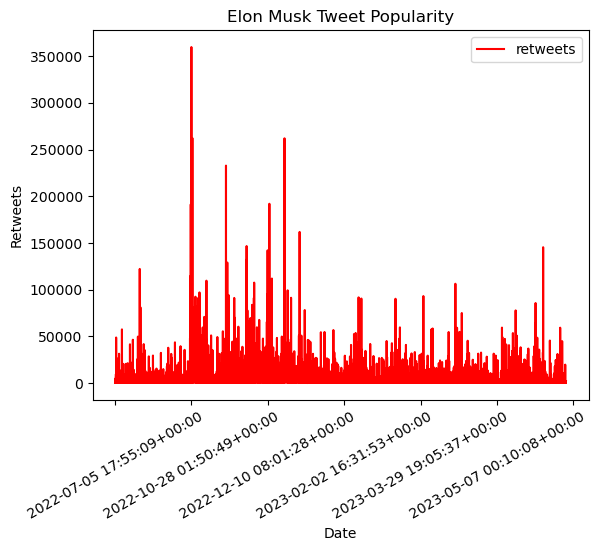

In [8]:
tweet.plot(kind='line',
        x='date',
        y='retweets',
        color='red')
 
# set the title
plt.title('Elon Musk Tweet Popularity')
plt.xlabel('Date')
plt.ylabel('Retweets')


plt.xticks(rotation=30)

                         
# show the plot
plt.show()

In [9]:
tweet[tweet['retweets'] > 150000]

,user_followers,user_friends,user_favourites,date,retweets,favorites
991,113963411,127,14989,2022-10-26 18:45:58+00:00,191299,1401044
999,114278719,127,15014,2022-10-28 03:49:11+00:00,359672,2500167
1012,114546147,129,15035,2022-10-28 21:16:42+00:00,262233,2401886
1452,119229460,130,15353,2022-11-19 00:47:45+00:00,232743,841319
2020,122369973,156,16216,2022-12-11 10:58:17+00:00,191910,1292613
2218,123438641,163,16437,2022-12-18 23:20:33+00:00,261976,617977
2416,124699168,165,16732,2022-12-28 07:11:15+00:00,161767,1239875


In [10]:
stock

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500
...,...,...,...,...,...,...,...
2269,2269,2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2270,2270,2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2271,2271,2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600
2272,2272,2024-01-12,220.080002,225.339996,217.149994,218.889999,122889000


## Disregard this cell

In [11]:
## oct 26, oct 28, nov 19, dec 11, dec 18, dec 28
tweet_dates = ['2022-10-26', '2022-10-28', '2022-11-19', '2022-12-11', '2022-12-18', '2022-12-28']
new_frame = []
deletions = []

for i in range(len(stock)):
    if stock.iloc[i]['Date'] in tweet_dates:
        for idx in range(i, i+10):
            new_frame.append(stock.iloc[idx])

            
new_frame = pd.DataFrame(new_frame)
new_frame

,Unnamed: 0,Date,Open,High,Low,Close,Volume
1968,1968,2022-10-26,219.399994,230.600006,218.199997,224.639999,85012500
1969,1969,2022-10-27,229.770004,233.809998,222.850006,225.089996,61638800
1970,1970,2022-10-28,225.399994,228.860001,216.350006,228.520004,69152400
1971,1971,2022-10-31,226.190002,229.850006,221.940002,227.539993,61554300
1972,1972,2022-11-01,234.050003,237.399994,227.279999,227.820007,62688800
1973,1973,2022-11-02,226.039993,227.869995,214.820007,214.979996,63070300
1974,1974,2022-11-03,211.360001,221.199997,210.139999,215.309998,56538800
1975,1975,2022-11-04,222.600006,223.800003,203.080002,207.470001,98622200
1976,1976,2022-11-07,208.649994,208.899994,196.660004,197.080002,93916500
1977,1977,2022-11-08,194.020004,195.199997,186.750000,191.300003,128803400


## Graph showing every Elon Musk tweet with over 150,000 retweets and its effect on the stock price (orange line shows the overall trend of TSLA stock prices)

/var/folders/_v/z7ywlj2x7ll58r_cj2_yq2k00000gn/T/ipykernel_20459/3371623566.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['index'] = pd.DataFrame(index)


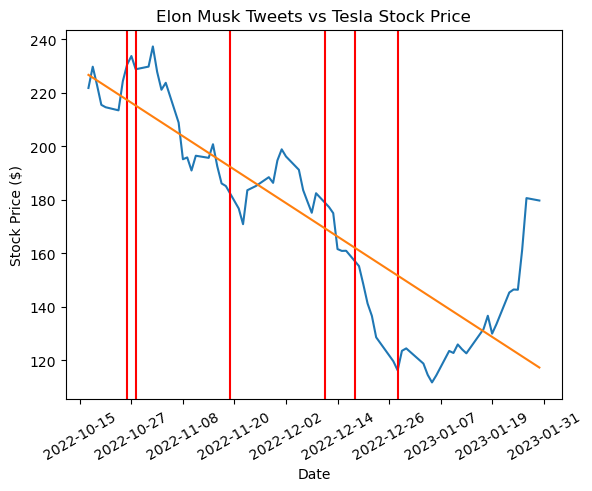

In [12]:
stock['Date'] = pd.to_datetime(stock['Date'], format='%Y-%m-%d')

stocks = stock
 
# Filter data between two dates
stock = stock.loc[(stock['Date'] >= '2022-10-15') & (stock['Date'] <= '2023-01-30')]

index = np.arange(0,72,1)

stock['index'] = pd.DataFrame(index)

tweet_dates = pd.to_datetime(tweet_dates, format='%Y-%m-%d')

x = stock['Date']
y = stock['High']

plt.plot(x, y)

 
for i in tweet_dates:
    plt.axvline(x = i, color = 'red', label = 'axvline - full height')

#find line of best fit
a, b = np.polyfit(x.astype(np.int64), y, 1)

#add points to plot

#add line of best fit to plot
plt.plot(x, a*x.astype(np.int64)+b)  


    
# set the title
plt.title('Elon Musk Tweets vs Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')


locs = ['2022-10-15', '2022-10-27', '2022-11-08', '2022-11-20', '2022-12-02', '2022-12-14', '2022-12-26', '2023-01-07', '2023-01-19', '2023-01-31']
##np.linspace(1, len(stock), 10)
labels = ['2022-10-15', '2022-10-27', '2022-11-08', '2022-11-20', '2022-12-02', '2022-12-14', '2022-12-26', '2023-01-07', '2023-01-19', '2023-01-31']



plt.xticks(locs, labels,rotation=30) 




# show the plot
plt.show()

In [13]:
stocks

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500
...,...,...,...,...,...,...,...
2269,2269,2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2270,2270,2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2271,2271,2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600
2272,2272,2024-01-12,220.080002,225.339996,217.149994,218.889999,122889000


## disregard this cell

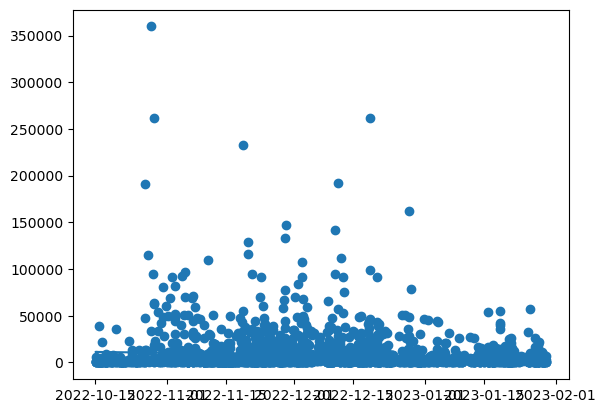

In [14]:

tweet['date'] = pd.to_datetime(tweet['date'], format='%Y-%m-%d', errors='coerce')

tweet = tweet.loc[(tweet['date'] >= '2022-10-15') & (tweet['date'] <= '2023-01-30')]

x = tweet['date']
y = tweet['retweets']

plt.scatter(x, y)

a, b = np.polyfit(x.astype(np.int64), y, 1)

#add points to plot

#add line of best fit to plot
plt.plot(x, a*x.astype(np.int64)+b)



## chart showing the correlation between tweet attributes. darker cells connote a stronger connection between attributes

/var/folders/_v/z7ywlj2x7ll58r_cj2_yq2k00000gn/T/ipykernel_20459/31952804.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tweet.corr(), center=0, cmap='BrBG', annot=True)


Text(0.5, 1.0, 'Tweet Attribute Multi-Collinearity')

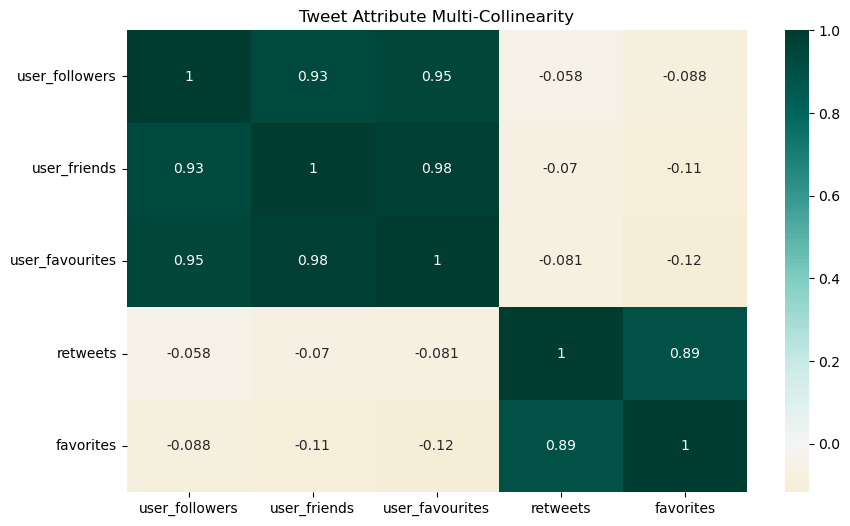

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(tweet.corr(), center=0, cmap='BrBG', annot=True)
ax.set_title('Tweet Attribute Multi-Collinearity')

In [16]:
tweet = tweet.drop(['user_followers', 'user_friends', 'user_favourites'], axis=1)

In [17]:
tweet.index = range(len(tweet.index))


In [18]:
count = 1
total_ret = 0
total_fav = 0
date = '2022-09-29'

deletions = []

##tweet = tweet.drop(columns=['user_followers', 'user_friends', 'user_favourites'])

    
for i in range(len(tweet)):
    if(i > 0 and tweet.iloc[i]['date'].strftime('%Y-%m-%d') == tweet.iloc[i-1]['date'].strftime('%Y-%m-%d')):
        count+=1
        total_ret = total_ret + tweet.iloc[i]['retweets']
        total_fav = total_fav + tweet.iloc[i]['favorites']
        deletions.append(i)
    else:
        tweet.loc[len(tweet.index)] = [date, total_ret, total_fav]
        count = 1
        date = tweet.iloc[i]['date']
        total_ret = tweet.iloc[i]['retweets']
        total_fav = tweet.iloc[i]['favorites']
        

In [19]:
for i in deletions:
    tweet = tweet.drop(labels=i, axis=0)

In [20]:
tweet

,date,retweets,favorites
0,2022-10-15 06:36:12+00:00,769,27400
8,2022-10-16 20:26:15+00:00,691,10708
25,2022-10-15 23:43:55+00:00,381,11391
41,2022-10-17 14:03:13+00:00,895,8758
59,2022-10-16 21:55:13+00:00,297,6970
...,...,...,...
2319,2023-01-26 23:41:40+00:00,34221,488143
2320,2023-01-28 02:09:37+00:00,27128,558334
2321,2023-01-27 23:29:36+00:00,94716,795003
2322,2023-01-29 06:04:17+00:00,11042,239674


## correlation between number of retweets and stock price is 0.276, indicating a weak connection between them. correlation between favorites and stock price is 0.301, indicating a slightly stronger connection

In [21]:
correlation1 = tweet['retweets'].corr(stocks['High'])
correlation2 = tweet['favorites'].corr(stocks['High'])
print(correlation1)
print(correlation2)

0.27639392058651396
0.3012580676258823


## new dataset containing tweets from 2021-2022 specifically mentioning Tesla

In [22]:
tweets = pd.read_csv('stock_tweets.csv')
tweets = tweets[tweets['Stock Name'] == 'TSLA']
tweets

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
37417,2021-09-30 02:52:38+00:00,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc."
37418,2021-09-30 02:40:26+00:00,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc."
37419,2021-09-30 01:59:02+00:00,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc."
37420,2021-09-30 01:38:26+00:00,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc."


## sentiment intensity for analyzing whether each specific tweet is positive or negative towards Tesla (-1 to 1 where -1 is extremely negative and 1 is extremely positive)

In [23]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jeremybullis/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
sen = SentimentIntensityAnalyzer()

In [25]:
scores = []
for i in range(len(tweets)):
    score = sen.polarity_scores(tweets.iloc[i]['Tweet'])
    scores.append(score['compound'])

In [26]:
tweets['Score'] = pd.DataFrame(scores)

## Score column displays the sentiment of each tweet

In [27]:
tweets

,Date,Tweet,Stock Name,Company Name,Score
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750
...,...,...,...,...,...
37417,2021-09-30 02:52:38+00:00,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc.",-0.1531
37418,2021-09-30 02:40:26+00:00,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc.",0.5719
37419,2021-09-30 01:59:02+00:00,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc.",0.0000
37420,2021-09-30 01:38:26+00:00,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc.",0.4215


In [28]:
tweets[tweets['Score'] < 0]

,Date,Tweet,Stock Name,Company Name,Score
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750
6,2022-09-29 22:24:22+00:00,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",-0.9359
9,2022-09-29 22:15:01+00:00,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",-0.8625
12,2022-09-29 21:11:30+00:00,$TSLAQ: Tesla’s dead in Europe! Everyone else ...,TSLA,"Tesla, Inc.",-0.7332
...,...,...,...,...,...
37398,2021-09-30 10:53:54+00:00,$TSLA flat at $781 pre-mkt as equities rose (S...,TSLA,"Tesla, Inc.",-0.2500
37404,2021-09-30 10:10:37+00:00,Just a reminder that when $TSLA fell from ATH ...,TSLA,"Tesla, Inc.",-0.9423
37406,2021-09-30 09:43:02+00:00,*Tesla Reportedly Loses A China Fraud Case In ...,TSLA,"Tesla, Inc.",-0.7269
37410,2021-09-30 06:38:00+00:00,🐳 news:\n\n- No debt ceiling passed\n- $HOOD 🤝...,TSLA,"Tesla, Inc.",-0.5719


In [29]:
print(tweets.iloc[8524]['Tweet'])
print(tweets.iloc[8524]['Score'])

Next QTR Earnings:
$AAPL : fucked (China)
$TSLA : fucked (China)
All Ad companies: fucked (recession)
Retail stocks: Fucked (consumer is dead)
Banks: fucked (inversion)
Crypto stocks: fucked (wonder why)
Shit stocks: fucker (they are shit stocks) https://t.co/NqjV5WCYun
-0.9911


In [30]:
print(tweets.iloc[4]['Tweet'])
print(tweets.iloc[4]['Score'])

@RealDanODowd @Tesla Stop trying to kill kids, you sad deranged old man
-0.875


In [31]:
print(tweets.iloc[7779]['Tweet'])
print(tweets.iloc[7779]['Score'])

Happy Birthday @elonmusk ! Hope it’s the best day ever ! I know your just a man but you are my hero. In honor of you my drawing is going into space on SpaceX CRS25 thanks to @joseph_borg_ . Hope you like it ❤️🚀 I would love to meet you someday
@RoseLeoMusk @ToscaMusk @Tesla https://t.co/hDdWAcSmKu
0.9877


In [32]:
text = tweets['Tweet']
text = pd.DataFrame(text)

dates = []
for i in range(len(tweets)):
    dates.append(tweets.iloc[i]['Date'])

text['Date'] = dates

tweets = tweets.drop('Tweet', axis=1)
tweets

,Date,Stock Name,Company Name,Score
0,2022-09-29 23:41:16+00:00,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29 23:24:43+00:00,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29 23:18:08+00:00,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29 22:40:07+00:00,TSLA,"Tesla, Inc.",-0.7568
4,2022-09-29 22:27:05+00:00,TSLA,"Tesla, Inc.",-0.8750
...,...,...,...,...
37417,2021-09-30 02:52:38+00:00,TSLA,"Tesla, Inc.",-0.1531
37418,2021-09-30 02:40:26+00:00,TSLA,"Tesla, Inc.",0.5719
37419,2021-09-30 01:59:02+00:00,TSLA,"Tesla, Inc.",0.0000
37420,2021-09-30 01:38:26+00:00,TSLA,"Tesla, Inc.",0.4215


## combining the scores so every day has one average sentiment score. the number of tweets made on each day is also recorded

In [33]:

deletions = []
total_score = tweets.iloc[0]['Score']
avg_score = tweets.iloc[0]['Score']
date = '2022-09-29'
count = 1

counts = [0] * len(tweets)
tweets['Tweet Count'] = counts

tweets['Agg. Score'] = counts


for i in range(37422):
    if(i > 0 and tweets.iloc[i]['Date'][:10] == tweets.iloc[i-1]['Date'][:10]):
        count+=1
        total_score = total_score + tweets.iloc[i]['Score']
        avg_score = total_score / count
        deletions.append(i)
    else:
        deletions.append(i)
        tweets.loc[len(tweets.index)] = [date, 'TSLA', 'Tesla, Inc.', avg_score, count, total_score] 
        count = 1
        date = tweets.iloc[i]['Date'][:10]
        total_score = tweets.iloc[i]['Score']
        avg_score = total_score
            


In [34]:


for i in deletions:
    tweets = tweets.drop(labels=i, axis=0)
        


SyntaxError: invalid syntax (2180148197.py, line 2)

## tweet count shows the amount of tweets made on a given day and agg. score shows the average score of every tweet posted on that day multiplied by the number of tweets to get a value for the average positivity towards tesla on each day(idk why 9-29 was counted twice)

In [ ]:
tweets

In [ ]:
stocks = stocks[stocks['Date'] <= '2022-09-29']
stocks = stocks[stocks['Date'] >= '2021-10-01']

stocks

## disregard

In [ ]:
tweets['Date'] = pd.to_datetime(tweets['Date'], format='%Y-%m-%d')

fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx()  


plt.title('TSLA-Related Tweet Sentiment vs. TSLA Stock Price', fontsize=18)

x1 = tweets['Date']
x2 = stocks['Date']
y1 = tweets['Score'] * tweets['Tweet Count']
y2 = stocks['High'] / 44

ax2.set_ylim(4, 20)

locs = ['2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01']
labels = ['Oct. \'21', 'Nov. \'21', 'Dec. \'21', 'Jan. \'22', 'Feb. \'22', 'Mar. \'22', 'Apr. \'22', 'May \'22', 'Jun. \'22', 'Jul. \'22', 'Aug. \'22', 'Sep. \'22', 'Oct. \'22']

locs = pd.to_datetime(locs, format='%Y-%m-%d')
plt.xticks(locs, labels, rotation=30)

y3 = stocks['Open'] / 44
y4 = stocks['Low'] / 44
y5 = stocks['Close'] / 44


ax1.plot(x1,y1, color='orange', label='Agg. Sentiment')
ax2.plot(x2,y2, color='green', label='TSLA High Price')


ax1.set_ylabel('TSLA-Related Tweet Sentiment', fontsize=14)
ax1.tick_params(axis="y", labelcolor='orange')

ax2.set_ylabel('TSLA Adjusted Stock Price', fontsize=14)
ax2.tick_params(axis="y", labelcolor='green')

fig.autofmt_xdate()

lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [l.get_label() for l in lines], loc='upper right')


plt.show()

In [ ]:
df1 = pd.DataFrame()
df1['Date'] = stocks['Date']
df1['High'] = stocks['High']
df1['Low'] = stocks['Low']
df1['Open'] = stocks['Open']
df1['Close'] = stocks['Close']

df2 = pd.DataFrame()
df2['Date'] = tweets['Date']
df2['Agg. Score'] = tweets['Agg. Score']



In [ ]:
df1

In [ ]:
df2

In [ ]:
df1.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)



In [ ]:
df1

In [ ]:
df2

## i've been using the high stock price for this project, which has a correlation of 0.417 when compared to agg. score, implying a slightly weak but still significant relationship

In [ ]:
df1_daily = df1.resample('D').mean()
df2_daily = df2.resample('D').mean()

correlation1 = df1_daily['High'].corr(df2_daily['Agg. Score'])
correlation2 = df1_daily['Low'].corr(df2_daily['Agg. Score'])
correlation3 = df1_daily['Open'].corr(df2_daily['Agg. Score'])
correlation4 = df1_daily['Close'].corr(df2_daily['Agg. Score'])


print("The correlation between the aggregate sentiment score and the TSLA high price is", '{:0.3f}'.format(correlation1))
print("The correlation between the aggregate sentiment score and the TSLA low price is", '{:0.3f}'.format(correlation2))
print("The correlation between the aggregate sentiment score and the TSLA open price is", '{:0.3f}'.format(correlation3))
print("The correlation between the aggregate sentiment score and the TSLA close price is", '{:0.3f}'.format(correlation4))

print("The overall correlation between the aggregate sentiment score and the TSLA stock price is", '{:0.3f}'.format((correlation1 + correlation2 + correlation3 + correlation4)/4))



In [ ]:

differences = []

print(type(tweets.iloc[10]['Date']))
print(type(stocks.iloc[10]['Date']))

merged = pd.merge(stocks, tweets, on='Date')

for i in range(len(merged)):
    score = merged.iloc[i]['Agg. Score']
    high = merged.iloc[i]['High']/44
    differences.append(score - high)
    
merged['Difference'] = np.array(differences)

merged

## i used a min max scaler to change the high stock price and the sentiment scores to be expressed on a scale of 0 to 1, where 0 corresponds to the minimum values of those columns, and 1 corresponds to the maximum

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
scaled_stocks = scaler.fit_transform(stocks.drop(['Date'],axis=1))
scaled_tweets = scaler.fit_transform(tweets.drop(['Date','Stock Name', 'Company Name'], axis=1).to_numpy())
scaled_tweets = pd.DataFrame(scaled_tweets)
scaled_tweets

In [ ]:
scaled_stocks

In [ ]:
scaled_stocks = pd.DataFrame(scaled_stocks)
scaled_tweets = pd.DataFrame(scaled_tweets)

dates = []
for i in range(len(stocks)):
    dates.append(stocks.iloc[i]['Date'])

scaled_stocks['Date'] = dates

dates = []
for i in range(len(tweets)):
    dates.append(tweets.iloc[i]['Date'])
    
scaled_tweets['Date'] = dates

## this graph shows the scaled stock price vs the scaled sentiment scores over the same time period from sep. 2021 to sep. 2022

In [ ]:
x1 = scaled_tweets['Date']
x2 = scaled_stocks['Date']
y1 = scaled_tweets[2]
y2 = scaled_stocks[2]

fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx() 

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)

ax1.set_ylabel('TSLA-Related Tweet Sentiment', fontsize=14)
ax2.set_ylabel('TSLA Stock Price', fontsize=14)

ax1.tick_params(axis="y", labelcolor='orange')
ax2.tick_params(axis="y", labelcolor='green')


plt.plot(x1, y1, color='orange', label='Tweet Sentiment')
plt.plot(x2, y2, color='green', label='Stock Price')
plt.legend()

fig.autofmt_xdate()

locs = ['2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01']
labels = ['Oct. \'21', 'Nov. \'21', 'Dec. \'21', 'Jan. \'22', 'Feb. \'22', 'Mar. \'22', 'Apr. \'22', 'May \'22', 'Jun. \'22', 'Jul. \'22', 'Aug. \'22', 'Sep. \'22', 'Oct. \'22']

locs = pd.to_datetime(locs, format='%Y-%m-%d')
plt.xticks(locs, labels, rotation=30)


plt.title("TSLA-Related Tweet Sentiment vs. TSLA Stock Price", fontsize=18)


In [ ]:
x1 = scaled_tweets['Date']
x2 = scaled_stocks['Date']
y1 = scaled_tweets[2]
y2 = scaled_stocks[2] / 2.7

fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx() 

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)

ax1.set_ylabel('TSLA-Related Tweet Sentiment', fontsize=14)
ax2.set_ylabel('TSLA Stock Price', fontsize=14)

ax1.tick_params(axis="y", labelcolor='orange')
ax2.tick_params(axis="y", labelcolor='green')


plt.plot(x1, y1, color='orange', label='Tweet Sentiment')
plt.plot(x2, y2, color='green', label='Stock Price')
plt.legend()

fig.autofmt_xdate()

locs = ['2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01']
labels = ['Oct. \'21', 'Nov. \'21', 'Dec. \'21', 'Jan. \'22', 'Feb. \'22', 'Mar. \'22', 'Apr. \'22', 'May \'22', 'Jun. \'22', 'Jul. \'22', 'Aug. \'22', 'Sep. \'22', 'Oct. \'22']

locs = pd.to_datetime(locs, format='%Y-%m-%d')
plt.xticks(locs, labels, rotation=30)


plt.title("TSLA-Related Tweet Sentiment vs. TSLA Stock Price", fontsize=18)


## in this graph, i scaled down the stock price by a constant factor just to show the similarity between the stock price line and the sentiment line. i drew arrows to two major dates, when tesla's market cap passed 1 trillion dollars for the first time and when elon musk bought twitter

In [ ]:
from datetime import datetime

fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx() 

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)


plt.title('TSLA-Related Tweet Sentiment vs. TSLA Stock Price', fontsize=18)

x1 = tweets['Date']
x2 = stocks['Date']
y1 = scaled_tweets[2]
y2 = scaled_stocks[2] / 2.5


locs = ['2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01']
labels = ['Oct. \'21', 'Nov. \'21', 'Dec. \'21', 'Jan. \'22', 'Feb. \'22', 'Mar. \'22', 'Apr. \'22', 'May \'22', 'Jun. \'22', 'Jul. \'22', 'Aug. \'22', 'Sep. \'22', 'Oct. \'22']

locs = pd.to_datetime(locs, format='%Y-%m-%d')
plt.xticks(locs, labels, rotation=30)




ax1.plot(x1,y1, color='orange')
ax2.plot(x2,y2, color='green')


ax1.set_ylabel('TSLA-Related Tweet Sentiment', fontsize=14)
ax1.tick_params(axis="y", labelcolor='orange')

ax2.set_ylabel('TSLA Stock Price', fontsize=14)
ax2.tick_params(axis="y", labelcolor='green')

fig.autofmt_xdate()

plt.axvline(x = datetime.strptime('2022-04-14', '%Y-%m-%d'), color = 'red', label = 'axvline - full height')




start = datetime.strptime('2021-11-05', '%Y-%m-%d')
end = datetime.strptime('2021-12-10', '%Y-%m-%d')

plt.annotate('TSLA market \ncap reaches \n$1 trillion', xy=(start,0.72), xytext=(end,0.8),arrowprops={})


start = datetime.strptime('2022-04-20', '%Y-%m-%d')
end = datetime.strptime('2022-07-05', '%Y-%m-%d')

plt.annotate('Elon Musk buys Twitter', xy=(start, 0.8), xytext=(end,0.85), arrowprops={})


plt.show()

In [ ]:
from datetime import datetime

fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx() 

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)


plt.title('TSLA-Related Tweet Sentiment vs. TSLA Stock Price', fontsize=18)

x1 = tweets['Date']
x2 = stocks['Date']
y1 = scaled_tweets[2]
y2 = scaled_stocks[2] / 2.5


locs = ['2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01']
labels = ['Oct. \'21', 'Nov. \'21', 'Dec. \'21', 'Jan. \'22', 'Feb. \'22', 'Mar. \'22', 'Apr. \'22', 'May \'22', 'Jun. \'22', 'Jul. \'22', 'Aug. \'22', 'Sep. \'22', 'Oct. \'22']

locs = pd.to_datetime(locs, format='%Y-%m-%d')
plt.xticks(locs, labels, rotation=30)




ax1.plot(x1,y1, color='orange')
ax2.plot(x2,y2, color='green')


ax1.set_ylabel('TSLA-Related Tweet Sentiment', fontsize=14)
ax1.tick_params(axis="y", labelcolor='orange')

ax2.set_ylabel('TSLA Stock Price', fontsize=14)
ax2.tick_params(axis="y", labelcolor='green')

fig.autofmt_xdate()

plt.axvline(x = datetime.strptime('2022-04-14', '%Y-%m-%d'), color = 'green', label = 'axvline - full height')
plt.axvline(x = datetime.strptime('2022-02-22', '%Y-%m-%d'), color = 'blue', label = 'axvline - full height')
plt.axvline(x = datetime.strptime('2022-06-25', '%Y-%m-%d'), color = 'red', label = 'axvline - full height')
plt.axvline(x = datetime.strptime('2022-01-26', '%Y-%m-%d'), color = 'purple', label = 'axvline - full height')




start = datetime.strptime('2021-11-05', '%Y-%m-%d')
end = datetime.strptime('2021-12-10', '%Y-%m-%d')



start = datetime.strptime('2022-04-20', '%Y-%m-%d')
end = datetime.strptime('2022-07-05', '%Y-%m-%d')


plt.text(datetime.strptime('2021-11-10', '%Y-%m-%d'), 0.8, 'TSLA market \ncap reaches \n$1 trillion', color='orange')
plt.text(datetime.strptime('2022-02-25', '%Y-%m-%d'), 0.6, 'Russia \ninvades \nUkraine', color='blue')
plt.text(datetime.strptime('2022-04-18', '%Y-%m-%d'), 0.8, 'Elon Musk \nbuys Twitter', color='green')
plt.text(datetime.strptime('2022-07-01', '%Y-%m-%d'), 0.7, 'Tesla announces it will \nlay off 3.5% of \nits workers', color='red')
plt.text(datetime.strptime('2021-11-22', '%Y-%m-%d'), 0.63, 'Musk reveals \nsupply chain \nissues', color='purple')



plt.show()



## the dates when the stock price and the sentiment hit their peaks

In [ ]:
print(stocks['Date'][stocks['High'] == stocks['High'].max()])
print(tweets['Date'][tweets['Agg. Score'] == tweets['Agg. Score'].max()])

In [ ]:
nov = tweets[tweets['Date'] > '2022-01-01']
nov = nov[nov['Date'] < '2022-02-01']
print(nov['Date'][nov['Agg. Score'] == nov['Agg. Score'].max()])

## the day when the stock price hit its lowest value

In [ ]:
print(stocks['Date'][stocks['High'] == stocks['High'].min()])

## some tweets from the day the sentiment was at its peak

In [ ]:
tweets[tweets['Agg. Score'] == tweets['Agg. Score'].max()]
high = text[text['Date'].str.contains('2021-10-25')]

print(high.iloc[100]['Tweet'])
print(high.iloc[150]['Tweet'])
print(high.iloc[50]['Tweet'])

## October 25, 2021 is the day Tesla's market cap first passed $1 trillion

In [ ]:
## https://www.reuters.com/business/autos-transportation/tesla-shares-rise-frankfurt-after-musks-5-bln-stock-sale-2021-11-11/
## elon musk sells $5 billion worth of Tesla shares, causing tesla stock price to dip

In [ ]:
from datetime import datetime
from datetime import timedelta

tweets['Date'] = pd.to_datetime(tweets['Date'])  # Convert 'Date' column to datetime format if not already

tweets['Date'] += timedelta(days=9)

In [ ]:
tweets

In [ ]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

df1['Date'] = tweets['Date']
df2['Date'] = stocks['Date']

df1['Agg. Score'] = tweets['Agg. Score']
df2['High'] = stocks['High']

df1.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)

df1_daily = df1.resample('D').mean()
df2_daily = df2.resample('D').mean()

correlation1 = df1_daily['Agg. Score'].corr(df2_daily['High'])
print('The correlation between aggregate sentiment score and stock price is:', '{:0.3f}'.format(correlation1))

In [ ]:
#7, 9, 10-.4378

In [ ]:
apple = pd.read_csv('apple_stock.csv')

In [ ]:
apple

In [ ]:
apple = apple[apple['Date'] >= '2021-10-01']
apple = apple[apple['Date'] <= '2022-09-29']
apple

In [ ]:
meta = pd.read_csv('META.csv')
meta = meta[meta['Date'] >= '2021-10-01']
meta = meta[meta['Date'] <= '2022-09-29']
meta

In [ ]:
import datetime
djia = pd.read_csv('DJIA.csv')
for i in range(len(djia)):
    year = (str)(djia.iloc[i]['Date'])[6:]
    day = (str)(djia.iloc[i]['Date'])[3:5]
    month = (str)(djia.iloc[i]['Date'])[0:2]
    djia.iloc[i]['Date'] = datetime.datetime((int)(year), (int)(month), (int)(day))
djia

for i in djia:
    if i != 'Date':
        for idx in range(len(djia)):
            djia.iloc[idx][i] = float(djia.iloc[idx][i].replace(',', ''))

In [ ]:
djia

In [ ]:
djia = djia.reindex(index=djia.index[::-1])
djia

In [ ]:
stocks

In [ ]:
scaled_apple = scaler.fit_transform(apple.drop(['Date'],axis=1))
scaled_meta = scaler.fit_transform(meta.drop(['Date'], axis=1))
scaled_djia = scaler.fit_transform(djia.drop(['Date'], axis=1))
pd.DataFrame(scaled_meta)

In [ ]:
scaled_djia

In [ ]:
import datetime

plt.figure(figsize=(8,6))


stocks['Date'] = pd.to_datetime(stocks['Date'].astype(str), format='%Y-%m-%d')
apple['Date'] = pd.to_datetime(apple['Date'].astype(str), format='%Y-%m-%d')
meta['Date'] = pd.to_datetime(meta['Date'].astype(str), format='%Y-%m-%d')
djia['Date'] = pd.to_datetime(djia['Date'].astype(str), format='%Y-%m-%d')


scaled_apple = pd.DataFrame(scaled_apple)
scaled_stocks = pd.DataFrame(scaled_stocks)
scaled_meta = pd.DataFrame(scaled_meta)
scaled_djia = pd.DataFrame(scaled_djia)

x1 = apple['Date']
y1 = scaled_apple[2]

# for i in range(len(stocks)):
#     day = (str)(stocks.iloc[i]['Date'])[8:10]
#     month = (str)(stocks.iloc[i]['Date'])[5:7]
#     year = (str)(stocks.iloc[i]['Date'])[0:4]
#     stocks.iloc[i]['Date'] = datetime.datetime((int)(year), (int)(month), (int)(day))




x2 = stocks['Date']
y2 = scaled_stocks[2]

x3 = meta['Date']
y3 = scaled_meta[1]

x4 = djia['Date']
y4 = scaled_djia[2]

locs = ['2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01']
labels = ['Oct. \'21', 'Nov. \'21', 'Dec. \'21', 'Jan. \'22', 'Feb. \'22', 'Mar. \'22', 'Apr. \'22', 'May \'22', 'Jun. \'22', 'Jul. \'22', 'Aug. \'22', 'Sep. \'22', 'Oct. \'22']

locs = pd.to_datetime(locs, format='%Y-%m-%d')
plt.xticks(locs, labels, rotation=30)

plt.plot(x1, y1, color='black', label='AAPL')
plt.plot(x2, y2, color='red', label = 'TSLA')

# plt.plot(x3, y3, color='blue', label = 'META')

plt.ylabel('Adjusted Stock Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.tick_params(axis="y", labelcolor='black')
plt.title('TSLA vs AAPL Stock Trends', fontsize=18)

plt.legend(loc='upper right')

# a1, b1 = np.polyfit(x2.astype(np.int64), y2, 1)
# a2, b2 = np.polyfit(x4.astype(np.int64), y4, 1)
# a3, b3 = np.polyfit(x1.astype(np.int64), y1, 1)

# plt.plot(x2, a1*x2.astype(np.int64)+b1, color='red') 
# plt.plot(x4, a2*x4.astype(np.int64)+b2, color='cyan') 
# plt.plot(x1, a3*x1.astype(np.int64)+b3, color='black')


fig.autofmt_xdate()

## https://www.kaggle.com/datasets/rafsunahmad/apple-stock-price
## https://www.kaggle.com/code/anushadixit1901/sentiment-analysis-on-stock-tweets/notebook
## https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction/code
## https://www.kaggle.com/datasets/jillanisofttech/tesla-stock-price/data?select=Tasla_Stock_Updated_V2.csv
## https://www.kaggle.com/datasets/gpreda/elon-musk-tweets
## https://www.kaggle.com/datasets/henryshan/meta-platforms-inc-meta

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(x2, y2, color='red', label = 'TSLA')
plt.plot(x4, y4, color='cyan', label = 'DJIA')
plt.ylabel('Adjusted Stock Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.tick_params(axis="y", labelcolor='black')
plt.title('TSLA Stock Trends vs Market Average', fontsize=18)

plt.legend(loc='upper right')

locs = pd.to_datetime(locs, format='%Y-%m-%d')
plt.xticks(locs, labels, rotation=30)
fig.autofmt_xdate()

In [ ]:
corr1 = y1.corr(y2)
print('The correlation between Apple and Tesla is:', '{:0.3f}'.format(corr1))
corr2 = y1.corr(y3)
print('The correlation between Apple and Meta is:', '{:0.3f}'.format(corr2))
corr3 = y2.corr(y3)
print('The correlation between Tesla and Meta is:', '{:0.3f}'.format(corr3))

corr4 = y1.corr(y4)
print('The correlation between Apple and the Dow Jones Industrial Average is:', '{:0.3f}'.format(corr4))
corr5 = y2.corr(y4)
print('The correlation between Tesla and the Dow Jones Industrial Average is:', '{:0.3f}'.format(corr5))
corr6 = y3.corr(y4)
print('The correlation between Meta and the Dow Jones Industrial Average is:', '{:0.3f}'.format(corr6))

In [ ]:
scaled_stocks